<a href="https://colab.research.google.com/github/SmithTheGreat/USACO-problems/blob/main/Credit_Card_Fraud_Detection_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
#dataset https://tinyurl.com/mpjjxvfn

In [ ]:
from google.colab import files
data = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [ ]:
data = pd.read_csv("creditcard.csv")
data = data[:100000]

In [ ]:
data.head()

print(data.shape)
print(data.describe())

(100000, 31)
                Time             V1             V2             V3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    42433.231550      -0.262177      -0.032307       0.676217   
std     17044.922359       1.859226       1.656981       1.322926   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     33471.750000      -1.028141      -0.598697       0.176770   
50%     44299.000000      -0.260557       0.078316       0.753976   
75%     55851.250000       1.153324       0.735790       1.376320   
max     67375.000000       1.960497      18.902453       4.226108   

                  V4             V5             V6             V7  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.162579      -0.278515       0.094065      -0.108711   
std         1.349263       1.356372       1.301349       1.210919   
min        -5.172595     -42.147898     -26.160506     -31.764946   
25%        -0.711468

In [ ]:
#Imbalance in the data
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

print('Amount details of the fraudulent transaction')
fraud.Amount.describe()


print('Amount details of the normal transaction')
valid.Amount.describe()

0.002234984014352005
Fraud Cases: 223
Valid Transactions: 99777
Amount details of the fraudulent transaction
Amount details of the normal transaction


,Amount
count,99777.000000
mean,97.920523
std,264.641755
min,0.000000
25%,7.580000
50%,26.360000
75%,89.000000
max,19656.530000


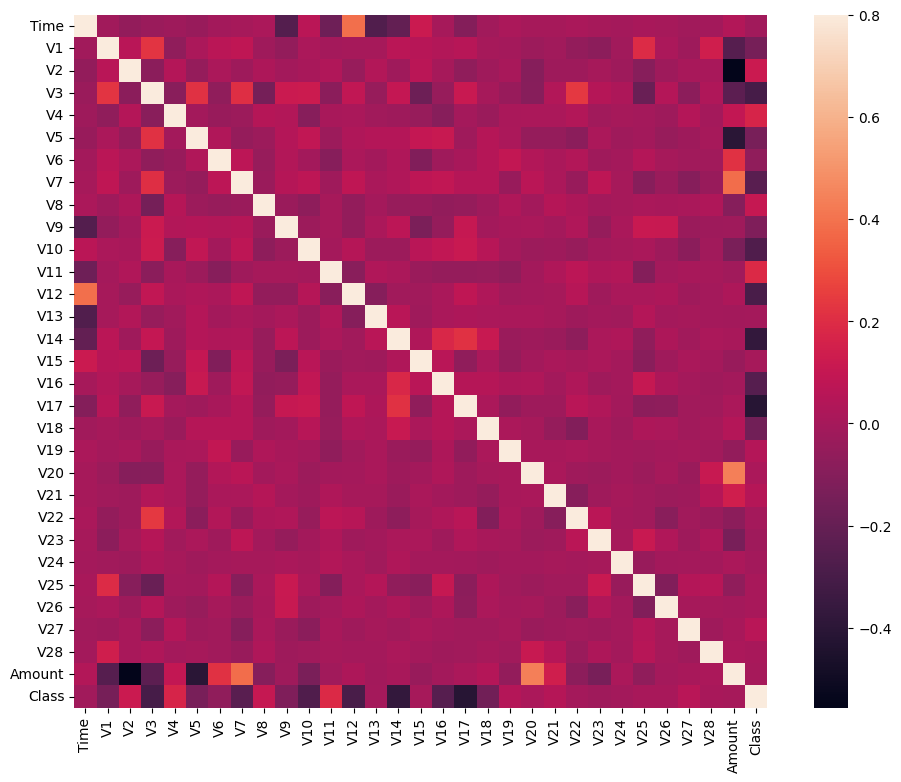

In [ ]:
#Plotting the Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
#Seperating the X and Y values
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

(100000, 30)
(100000,)


In [ ]:

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)


In [ ]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [ ]:
print("Accuracy:", accuracy_score(yTest, yPred))
print("Precision:", precision_score(yTest, yPred))
print("Recall:", recall_score(yTest, yPred))
print("F1 Score:", f1_score(yTest, yPred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(yTest, yPred))

Accuracy: 0.99935
Precision: 0.975609756097561
Recall: 0.7692307692307693
F1 Score: 0.8602150537634409
Matthews Correlation Coefficient: 0.8660009694482375


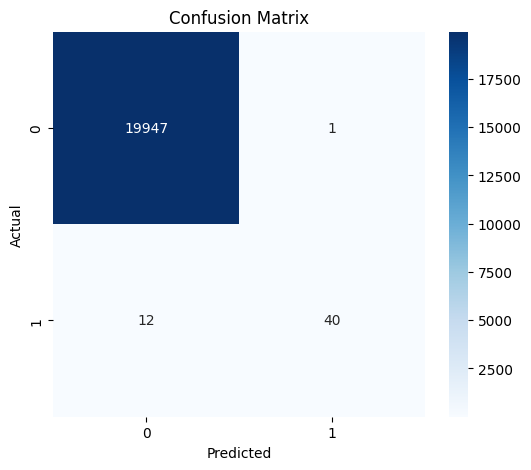

In [ ]:
cm = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
xTrainRes, yTrainRes = sm.fit_resample(xTrain, yTrain)

In [ ]:
#retrain
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(xTrainRes, yTrainRes)

yPred = rfc.predict(xTest)

In [ ]:
print("Accuracy:", accuracy_score(yTest, yPred))
print("Precision:", precision_score(yTest, yPred))
print("Recall:", recall_score(yTest, yPred))
print("F1 Score:", f1_score(yTest, yPred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(yTest, yPred))

Accuracy: 0.9993
Precision: 0.8958333333333334
Recall: 0.8269230769230769
F1 Score: 0.86
Matthews Correlation Coefficient: 0.8603416860305501


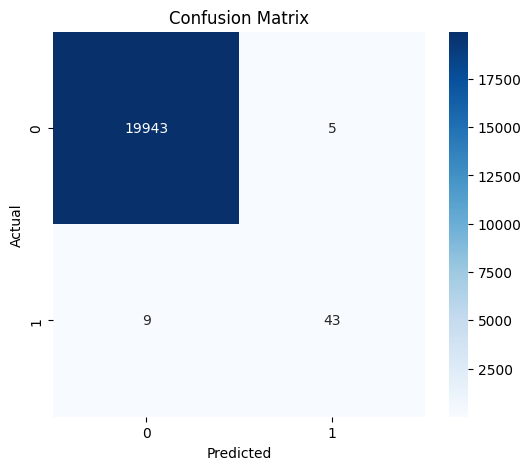

In [ ]:
cm = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

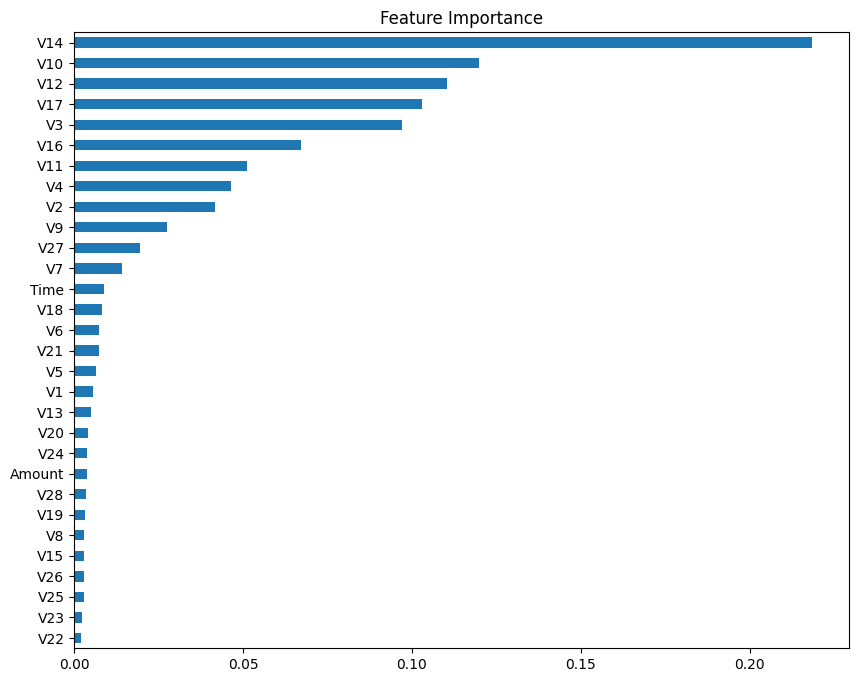

In [ ]:
feat_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Feature Importance")
plt.show()